<a href="https://colab.research.google.com/github/gadilshina-ve/SoftwareTools_DA/blob/main/PW_02/PW_02_Gadilshina_Valentina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическая работа 2. Парсинг HTML. BeautifulSoup

### **Вариант 16. Гадильшина Валентина, БД-231м.**

**Цель практической работы:** освоение техники парсинга HTML-страниц с помощью
библиотеки BeautifulSoup в языке программирования Python для сбора, консолидации и
аналитической обработки финансовой и экономической информации.

**Общие требования к заданию.**
1. Использовать Python 3 и библиотеку BeautifulSoup4 для парсинга данных.
2. Собрать данные с одного или нескольких предложенных источников.
3. Проанализировать собранные данные и представить результаты в виде графиков или
таблиц.
4. Составить отчет, содержащий код, результаты и анализ

**Задача**: Извлечение и анализ данных о рейтинге самых продаваемых автомобилей 2023
года в России с сайта: https://greenway.icnet.ru/cars-sales-actual-russia.html#null

**Шаги решения задачи:**

In [1]:
#1. Установка необходимых библиотек:
!pip install requests beautifulsoup4 pandas matplotlib


In [2]:
#2. Импортирование библиотек python
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#3. Получение HTML-кода страницы.
url = 'https://greenway.icnet.ru/cars-sales-actual-russia.html#null'
response = requests.get(url)
page_content = response.content

In [4]:
#4. Парсинг HTML с помощью BeautifulSoup.
soup = BeautifulSoup(page_content, 'html.parser')
table = soup.find('table', {'id': 'unique_id'}) # Ищем таблицу с id='unique_id'
rows = table.find_all('tr')

In [5]:
#5. Извлечение данных и создание DataFrame.
data = []
for row in rows[1:]:  # Пропускаем заголовок
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    data.append(cols)

# Создаем DataFrame
df = pd.DataFrame(data, columns=['Rank', 'Brand', 'Sales_2024', 'Sales_2023',
                                 'Change_percent_2024', 'Brand_2', 'Cumulative_2024',
                                 'Cumulative_2023', 'Cumulative_Change_percent'])

# Заменяем '-' на NaN, чтобы избежать ошибок при преобразовании
df.replace('-', np.nan, inplace=True)

# Преобразуем числовые значения
df['Sales_2024'] = df['Sales_2024'].str.replace(',', '.').astype(float)
df['Sales_2023'] = df['Sales_2023'].str.replace(',', '.').astype(float)
df['Change_percent_2024'] = df['Change_percent_2024'].str.replace(',', '.').astype(float)
df['Cumulative_2024'] = df['Cumulative_2024'].str.replace(',', '.').astype(float)
df['Cumulative_2023'] = df['Cumulative_2023'].str.replace(',', '.').astype(float)
df['Cumulative_Change_percent'] = df['Cumulative_Change_percent'].str.replace(',', '.').astype(float)
df


,Rank,Brand,Sales_2024,Sales_2023,Change_percent_2024,Brand_2,Cumulative_2024,Cumulative_2023,Cumulative_Change_percent
0,1,Lada,38.6,28.7,34.3,Lada,281.6,190.6,47.7
1,2,Haval,18.6,11.0,69.1,Haval,116.7,58.1,100.9
2,3,Chery,16.5,13.4,23.4,Chery,102.1,71.3,43.2
3,4,Geely,14.5,8.4,73.1,Geely,96.7,49.8,94.0
4,5,Changan,11.4,6.9,66.4,Changan,71.5,20.9,242.6
5,6,Omoda,4.7,6.0,-22.1,Omoda,35.1,24.3,44.2
6,7,Jetour,3.7,1.3,174.8,Exeed,29.7,25.1,19.2
7,8,Exeed,3.5,4.9,-28.4,Jetour,21.7,NaN,NaN
8,9,Belgee,3.5,NaN,NaN,Belgee,21.3,NaN,NaN
9,10,Jaecoo,2.9,NaN,NaN,Jaecoo,16.2,NaN,NaN


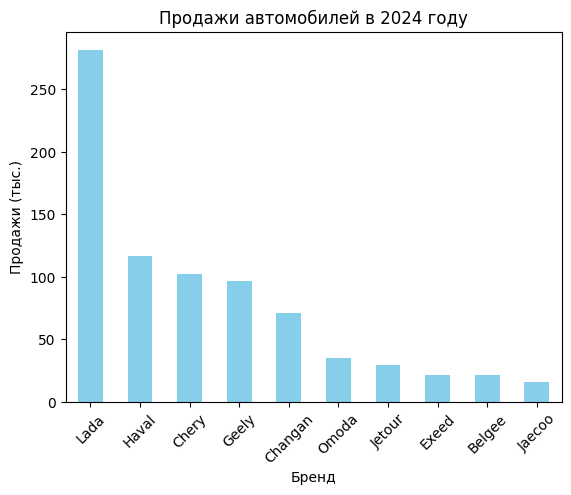

In [6]:
#6.Анализ данных.
#график продаж автомобилей в 2024 году для каждого бренда

df.plot(kind='bar', x='Brand', y='Cumulative_2024', legend=False, color='skyblue')
plt.title('Продажи автомобилей в 2024 году')
plt.xlabel('Бренд')
plt.ylabel('Продажи (тыс.)')
plt.xticks(rotation=45)
plt.show()

**Вывод:** С января по август 2024 года лидером продаж являются автомобили марки Lada (отечественный автопром), а после идут автомобили китайских марок.

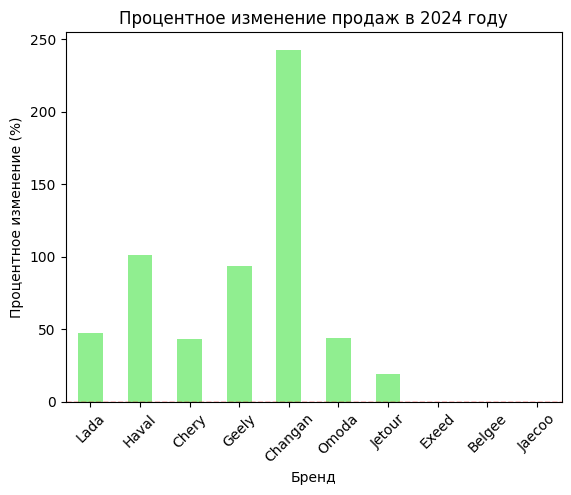

In [7]:
#график для процента изменения продаж для каждого бренда в 2024 году по сравнению с предыдущим годом
ax = df.plot(kind='bar', x='Brand', y='Cumulative_Change_percent', legend=False,
color='lightgreen')
plt.axhline(0, color='red', linewidth=1, linestyle='--')
plt.title('Процентное изменение продаж в 2024 году')
plt.xlabel('Бренд')
plt.ylabel('Процентное изменение (%)')
plt.xticks(rotation=45)
plt.show()

**Вывод:** С января по август 2024 года лидерами по росту продаж являются автомобили китайских марок Changan, Haval, Geely.

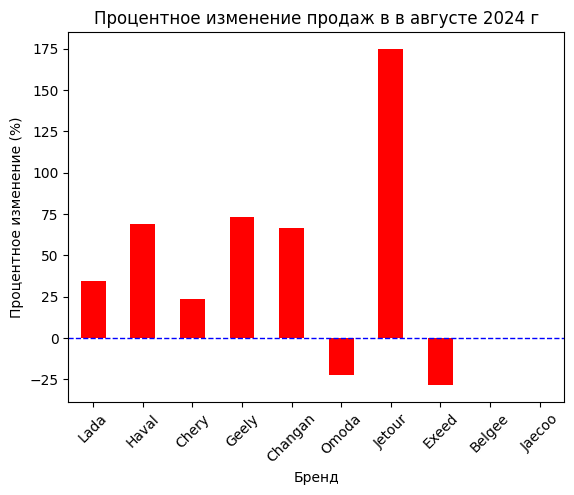

In [8]:
#график для процента изменения продаж для каждого бренда в августе 2024 году по сравнению с августом 2023
ax = df.plot(kind='bar', x='Brand', y='Change_percent_2024', legend=False, color='red')
plt.axhline(0, color='blue', linewidth=1, linestyle='--')
plt.title('Процентное изменение продаж в в августе 2024 г')
plt.xlabel('Бренд')
plt.ylabel('Процентное изменение (%)')
plt.xticks(rotation=45)
plt.show()

**Вывод:** В августе 2024 года были более популярные автомобили марки Jetour по сравнению с августом 2023 года, а также упали продажи автомобили марок Omoda и Exceed.

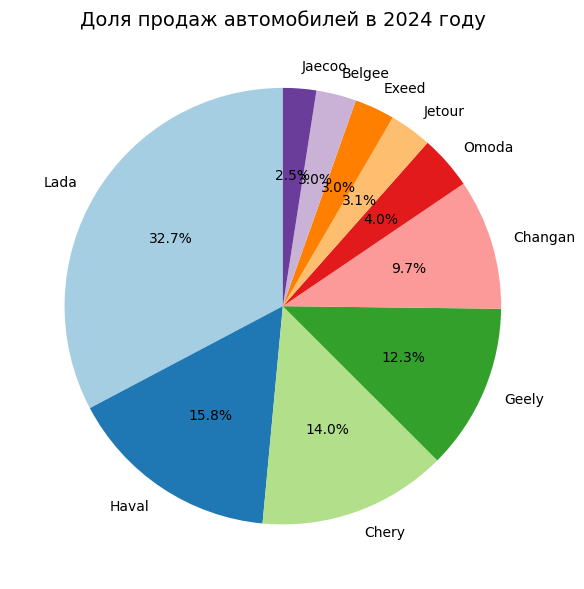

In [11]:
# Круговая диаграммы для продаж в 2024 году
plt.figure(figsize=(6, 6))
plt.pie(df['Sales_2024'], labels=df['Brand'], autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

plt.title('Доля продаж автомобилей в 2024 году', fontsize=14)
plt.tight_layout()
plt.show()

**Вывод:** С января по август 2024 года лидерами по продажам (количесво штук) являются автомобили российской марки Lada и китайских марок Haval, Chery, Geely.